#### _Ev Fiyatları_
- _Verilerinizi eğitim ve test kümelerine ayırın._
- _Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin._
- _Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin._
- _Modelinizin performansı tatmin edici mi? Açıklayın._
- _Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın._

> Önceki ödevin üzerinden devam edilmiştir.

In [12]:
Y = dfc['SalePrice']
col = [dfc[['OverallQual', 'GrLivArea', 'GarageArea']],
       dfc[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt']],
       dfc[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']], 
       dfc[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'YearRemodAdd']],
       dfc[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'KitchenQual_Ex', 'Foundation_PConc', 'Fireplaces',
       'ExterQual_Gd', 'ExterQual_Ex', 'HeatingQC_Ex', 'Neighborhood_NridgHt']]]

In [32]:
def perfstats(col, Y):
    
    pf = pd.DataFrame(columns=['model', 'rsq', 'rsq_adj', 'f_value', 'aic', 'bic'])
    pd.options.display.float_format = '{:.3f}'.format
    
    for num,X in enumerate(col,1): 
        model = LinearRegression().fit(X, Y)
        X = sm.add_constant(X)
        results = sm.OLS(Y, X).fit()
        pf.loc[num] = ('model_'+str(num) , results.rsquared, results.rsquared_adj, results.fvalue, results.aic, results.bic)
    return pf

In [36]:
def predstats(col, Y, perc):
    
    pf = pd.DataFrame(columns=['model', 'mae', 'mse', 'rmse', 'mape']) 
    pd.options.display.float_format = '{:.3f}'.format
    
    for num,X in enumerate(col,1): 
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = perc, random_state = 42)
        
        x_train = sm.add_constant(x_train)
        results = sm.OLS(y_train, x_train).fit()
        x_test = sm.add_constant(x_test)
        y_pred = results.predict(x_test)
        
        pf.loc[num] = ('model_'+str(num) , mean_absolute_error(y_test, y_pred), 
                       mse(y_test, y_pred), rmse(y_test, y_pred), (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
    return pf

In [38]:
def predplts(col, Y, size):
    
    if(len(col) % 3) == 0:
        row = int(len(col) / 3)
    elif (len(col) % 3) != 0:
        row = int((len(col) // 3) +1)
    
    for num,X in enumerate(col,1): 
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = size, random_state = 42)
        
        x_train = sm.add_constant(x_train)
        results = sm.OLS(y_train, x_train).fit()
        x_test = sm.add_constant(x_test)
        y_pred = results.predict(x_test)
            
        plt.subplot(row, 3, num)
        sns.scatterplot(x=y_test, y=y_pred)
        sns.lineplot(x=y_test, y=y_test, color='salmon', label='ytest')
        plt.ylabel("predict")
        plt.title('model_'+str(num))
        plt.tight_layout()
    return 

In [34]:
perfstats(col, Y)

,model,rsq,rsq_adj,f_value,aic,bic
1,model_1,0.740,0.739,1377.027,35108.860,35130.002
2,model_2,0.767,0.766,955.483,34951.581,34983.294
3,model_3,0.771,0.770,698.398,34928.182,34970.466
4,model_4,0.766,0.765,680.301,34957.631,34999.915
5,model_5,0.806,0.803,351.062,34710.694,34805.833


In [42]:
predstats(col, Y, 0.2)

,model,mae,mse,rmse,mape
1,model_1,24817.418,1046990147.309,32357.227,16.222
2,model_2,22676.831,875576528.198,29590.142,14.556
3,model_3,22375.141,864697728.822,29405.743,14.411
4,model_4,22830.248,897851240.442,29964.166,15.017
5,model_5,20905.071,799696523.155,28278.906,12.820


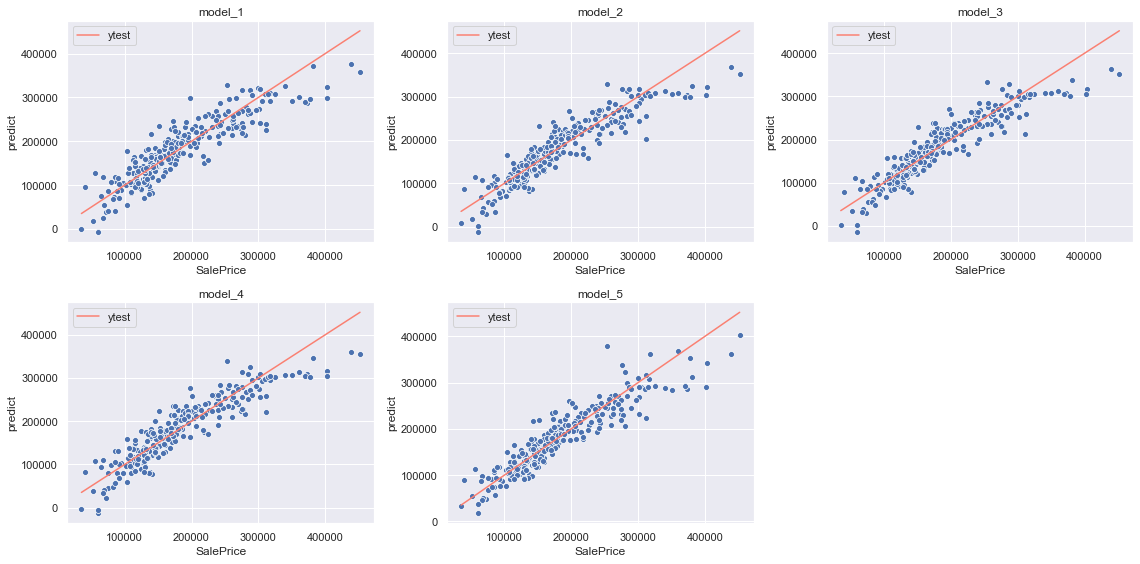

In [29]:
plt.figure(figsize=(16,8))
predplts(col, Y, 0.2)

- Tablo ve grafikler incelendiğinde modeller arasında oldukça az fark görünüyor. 
- Sadece grafikleri değerlendirdiğimizde, seçilemeyecek küçüklükte farklılıklar görülebilir. Dolayısyla istatistikseldeğerlerin incelenmesi gerekiyor. Ama grafiklerden düşük ve orta değerlerin daha iyi sonuç verdiği gözlemlenmektedir.
- Metriklerin olduğu tablo (predstats) incelendiğinde, model_5'in yüzde olarak hata değerinin en az olduğu görülmektedir. Tabi diğer metriklerde en düşük değerlere sahiptir.
- Bu modelin Rsq değeri (0.803) incelendiğinde, diğerlerine oranla en açıklayıcı model olduğu görülmektedir.